In [1]:
from os import listdir
from os.path import isfile, join

# list all the files in the folder
onlyfiles = [f for f in listdir("./") if isfile(join("./", f))]
# remove the ipynb
onlyfiles.remove('run_test_analysis.ipynb')
# remove the processed
onlyfiles = [i for i in onlyfiles if "processed" in i] 
# Print all the files:
print("{} files available for analysis.".format(len(onlyfiles)))
# print(onlyfiles)

19 files available for analysis.


Index(['azi0', 'azi1', 'azi2', 'tilt0', 'tilt1', 'tilt2', 'gcr0', 'gcr1',
       'gcr2', 'Net-Electricity', 'total_cost', 'total_cap', 'cap0', 'cap1',
       'cap2', 'Cost Break', 'Panel Energy Produced', 'Energy Imported',
       'Roof Area Used'],
      dtype='object')
   totalcost  netimport  evaluations  run_num
0    3469.74    42836.6        100.0      0.0
1    3469.74    42836.6        100.0      2.0
2    3469.74    42836.6        100.0      3.0
3    3469.74    42836.6        100.0      4.0
4    3469.74    42836.6        100.0      5.0


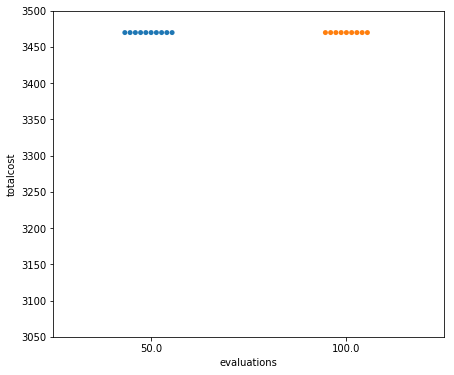

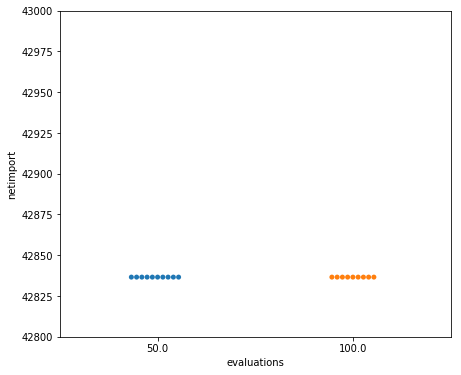

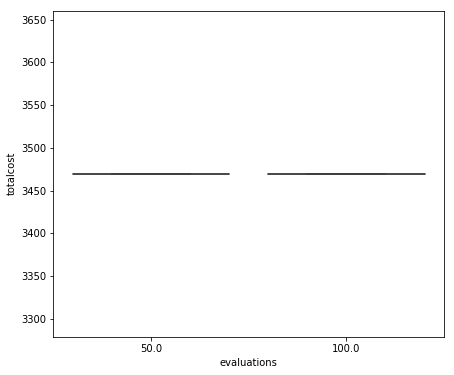

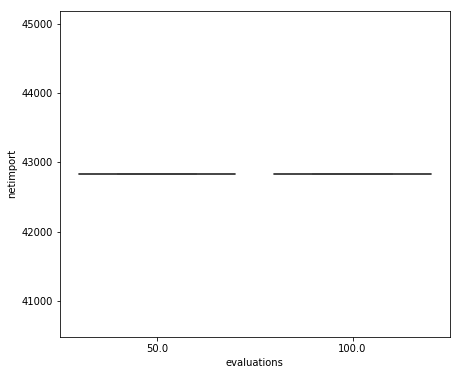

In [12]:
import pandas as pd
all_excel_files = []
eva_nums = []
run_nums = []
for file_ in onlyfiles:
    eva_nums.append(float(file_.replace('.', '_').split("_")[-3]))
    run_nums.append(float(file_.replace('.', '_').split("_")[-2]))
    all_excel_files.append(pd.read_excel(file_, index_col=0))

print(all_excel_files[4].columns)

df = pd.DataFrame(columns=('totalcost',"netimport", 'evaluations','run_num'))
for i in range(len(onlyfiles)):
    #print(all_excel_files[i])
    df.loc[i] = [float(all_excel_files[i]['total_cost'].min()),
                 float(all_excel_files[i]['Energy Imported'].min()),
                 eva_nums[i],run_nums[i]]



import seaborn as sns
import matplotlib.pyplot as plt

print(df.head())

f, ax = plt.subplots(figsize=(7, 6))
g = sns.swarmplot(x="evaluations", y="totalcost", data=df)
g.set(ylim=(3050, 3500))
f, ax = plt.subplots(figsize=(7, 6))
h = sns.swarmplot(x="evaluations", y="netimport", data=df)
h.set(ylim=(42800, 43000))
f, ax = plt.subplots(figsize=(7, 6))
sns.boxplot(x="evaluations", y="totalcost", data=df)
f, ax = plt.subplots(figsize=(7, 6))
sns.boxplot(x="evaluations", y="netimport", data=df)

In [6]:
df

totalcost  netimport  evaluations  run_num
0     3469.74    42836.6        100.0      0.0
1     3469.74    42836.6        100.0      2.0
2     3469.74    42836.6        100.0      3.0
3     3469.74    42836.6        100.0      4.0
4     3469.74    42836.6        100.0      5.0
5     3469.74    42836.6        100.0      6.0
6     3469.74    42836.6        100.0      7.0
7     3469.74    42836.6        100.0      8.0
8     3469.74    42836.6        100.0      9.0
9     3469.74    42836.6         50.0      0.0
10    3469.74    42836.6         50.0      1.0
11    3469.74    42836.6         50.0      2.0
12    3469.74    42836.6         50.0      3.0
13    3469.74    42836.6         50.0      4.0
14    3469.74    42836.6         50.0      5.0
15    3469.74    42836.6         50.0      6.0
16    3469.74    42836.6         50.0      7.0
17    3469.74    42836.6         50.0      8.0
18    3469.74    42836.6         50.0      9.0